Title: Expense Analyzing and Prediction

Description:

There is a dataset of 4 persons family expences during three years, these dataset includes 11 features [ Date,Account,Category,Subcategory, Note, CAD,Income/Expense, Description, Amount, Currency,Account]
I want to use date, category, income/expense and amount

from income/expense I need only expences becuase the aim is analyzing and prediction my expenses

category include 27 items which i will expand them as new features to use in next analysing and also I merged some of them as bellow:

education : documentary + Education

Grocery: Grocery

Personal Expense: family_group1 + family_group2 + Selfcare + Smoking

Car: Gas + Parking + vehicle

Health_insurance: health&insurance

Entertainment: Drink&Entertainment + Gift+ Restaurant + Trips

furniture: Home appliance

Bills: Mobile&internet , RBC, transportation

Home: Renting

# Import libraries:

In [19]:
import pandas as pd
import plotly.express as px


# `1- Data Preprocessing:`

In [20]:
from google.colab import files

uploaded = files.upload()

init_dataset = next(iter(uploaded))

df_maindata = pd.read_excel(init_dataset, engine='openpyxl')


df_maindata.head()

#initial_row_count = df_maindata.shape[0]
#print(f"Initial row count: {initial_row_count}")

Saving accounting4.xlsx to accounting4.xlsx


,Date,Account,Category,Subcategory,Note,Income/Expense,Description,Amount,Currency,Account.1
0,2024-07-30 09:42:38,Accounts,Grocery,NaN,IGA,Expense,NaN,35.200,CAD,16.00
1,2024-07-29 16:57:11,Accounts,Grocery,NaN,Dollarama,Expense,NaN,20.614,CAD,9.37
2,2024-07-29 11:36:46,Accounts,Trips,NaN,Beach,Expense,Oka,126.000,CAD,70.00
3,2024-07-29 11:32:39,Accounts,Home Appliances,NaN,Amazon,Expense,NaN,131.575,CAD,52.63
4,2024-07-29 11:20:03,Accounts,family_group1,NaN,Winners,Expense,Ck watch,218.500,CAD,115.00


In [25]:
df_expenses = df_maindata[['Date', 'Category', 'Amount']]
display(df_expenses.head())
expenses_row_count = df_expenses.shape[0]
print(f"Row count after filtering for expenses: {expenses_row_count}")

,Date,Category,Amount
0,2024-07-30 09:42:38,Grocery,35.200
1,2024-07-29 16:57:11,Grocery,20.614
2,2024-07-29 11:36:46,Trips,126.000
3,2024-07-29 11:32:39,Home Appliances,131.575
4,2024-07-29 11:20:03,family_group1,218.500


Row count after filtering for expenses: 1717


In [26]:
def map_category(Category):
    category_mapping = {
        'documentary': 'education',
        'Drink & Entertainment': 'entertainment',
        'Education': 'education',
        'Gas': 'car',
        'Gift': 'grocery',
        'Grocery': 'grocery',
        'family_group2': 'personal_expense',
        'Health & Insurance': 'health_insurance',
        'Home Appliances': 'furniture',
        'family_group1': 'personal_expense',
        'Mobile&internet': 'bills',
        'Parking': 'car',
        'Quarantine':'quarantine',
        'RBC': 'bills',
        'Renting': 'home',
        'Restaurant': 'entertainment',
        'Self Care': 'personal_expense',
        'Smoking': 'personal_expense',
        'Transportation': 'bills',
        'Trips': 'entertainment',
        'Vehicle': 'car'
    }
    return category_mapping.get(Category, Category)

df_expenses['Category'] = df_expenses['Category'].apply(map_category)



unique_dates = df_expenses['Date'].unique()
unique_categories = df_expenses['Category'].unique()
df_expenses.head()


<ipython-input-26-54a7581f12bd>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Category,Amount
0,2024-07-30 09:42:38,grocery,35.200
1,2024-07-29 16:57:11,grocery,20.614
2,2024-07-29 11:36:46,entertainment,126.000
3,2024-07-29 11:32:39,furniture,131.575
4,2024-07-29 11:20:03,personal_expense,218.500


In [27]:
# Group by 'Date' and 'Category'
df_expenses = df_expenses.groupby(['Date', 'Category']).agg({'Amount': 'sum'}).reset_index()
# Sort by 'Date'
df_expenses.sort_values(by='Date', inplace=True)
display(df_expenses.head())

print(df_expenses.shape[0])  # Check the new row count

,Date,Category,Amount
0,2021-05-01 21:20:52,grocery,1464.43
1,2021-05-01 21:24:00,entertainment,56.35
2,2021-05-01 21:24:30,entertainment,57.50
3,2021-05-01 21:36:28,bills,425.00
4,2021-05-01 21:36:49,education,61.60


1715


In [30]:
import pandas as pd

# this section i create a new column for each month of the year and sum all amounts per each month
df_expenses['Date'] = pd.to_datetime(df_expenses['Date'])
df_expenses['YearMonth'] = df_expenses['Date'].dt.to_period('M')
df_monthly_expenses = df_expenses.groupby(['YearMonth', 'Category']).agg({'Amount': 'sum'}).reset_index()
df_monthly_expenses.sort_values(by='YearMonth', inplace=True)


display(df_monthly_expenses.head())
print(df_monthly_expenses.shape[0])



grocery_df = df_monthly_expenses[df_monthly_expenses['Category'] == 'grocery']
grocery_df.to_csv("Data_grocery.csv", index=False)

,YearMonth,Category,Amount
0,2021-05,bills,707.303
1,2021-05,education,119.000
2,2021-05,entertainment,143.850
3,2021-05,furniture,3512.425
4,2021-05,grocery,1464.430


267


In [31]:

df_monthly_expenses.to_excel('transformed_accounting.xlsx', index=False)


# Downloading
#files.download('transformed_accounting.xlsx')


# Visualization:
1- Animated Visual :

In [32]:
# Create the line scatter plot


# Ensure 'YearMonth' is in string format
df_monthly_expenses['YearMonth'] = df_monthly_expenses['YearMonth'].astype(str)


fig = px.line(
    df_monthly_expenses,
    x='YearMonth',
    y='Amount',
    color='Category',
    markers=True,
    title='Expenses per Category Over Time',
    labels={'YearMonth': 'Month', 'Amount': 'Expense Amount', 'Category': 'Expense Category'}
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Expense Amount',
    legend_title='Category',
    xaxis=dict(
        tickmode='array',
        tickvals=df_monthly_expenses['YearMonth'].unique(),
        ticktext=[str(period) for period in df_monthly_expenses['YearMonth'].unique()]
    )
)

# Show plot
fig.show()


In [38]:
import pandas as pd
import plotly.express as px

# Check if all categories are in the DataFrame
#print(df_monthly_expenses['Category'].unique())

# Create a complete DataFrame with all combinations of YearMonth and Category
all_categories = df_monthly_expenses['Category'].unique()
all_yearmonths = df_monthly_expenses['YearMonth'].unique()
complete_index = pd.MultiIndex.from_product([all_yearmonths, all_categories], names=['YearMonth', 'Category'])
complete_df = pd.DataFrame(index=complete_index).reset_index()

# Merge with the original DataFrame and fill missing values with zero
df_complete = pd.merge(complete_df, df_monthly_expenses, on=['YearMonth', 'Category'], how='left').fillna(0)

# Create the animated histogram
fig = px.histogram(
    df_complete,
    x='Category',
    y='Amount',
    animation_frame='YearMonth',
    category_orders={'Category': sorted(all_categories)},  # Ensure all categories are in order
    title='Expenses per Category per Month',
    labels={'Category': 'Expense Category', 'Amount': 'Expense Amount'},
    color='Category',
    barmode='group'
)

fig.update_layout(
    xaxis_title='Expense Category',
    yaxis_title='Expense Amount',
    yaxis_range=[0, 3500],
    legend_title='Category'
)
fig.update_xaxes(tickangle=-60)
# Show plot
fig.show()


In [39]:
import plotly.express as px
import pandas as pd

# Create a complete DataFrame with all combinations of YearMonth and Category
all_categories = df_monthly_expenses['Category'].unique()
all_yearmonths = df_monthly_expenses['YearMonth'].unique()
complete_index = pd.MultiIndex.from_product([all_yearmonths, all_categories], names=['YearMonth', 'Category'])
complete_df = pd.DataFrame(index=complete_index).reset_index()

# Merge with the original DataFrame and fill missing values with zero
df_complete = pd.merge(complete_df, df_monthly_expenses, on=['YearMonth', 'Category'], how='left').fillna(0)

# Create the animated scatter plot
fig = px.scatter(
    df_monthly_expenses,
    x='Amount',
    y='Category',
    animation_frame='YearMonth',
    animation_group='Category',
    size='Amount',
    color='Category',
    hover_name='Category',
    size_max=50,
    title='Expenses per Category per Month',
    labels={'Amount': 'Total Amount', 'Category': 'Expense Category'}
)

# Update layout to ensure all categories are visible
fig.update_layout(
    xaxis_title='Total Amount',
    yaxis_title='Expense Category',
    legend_title='Category',
    legend=dict(
        title='Expense Category',
        orientation='h',  # Horizontal orientation
        yanchor='bottom',
        y=1.02,  # Position above the plot
        xanchor='right',
        x=1  # Align to the right
    ),
    yaxis=dict(
        categoryorder='total ascending'  # Order categories by total amount
    )
)

# Show the plot
fig.show()


# Predictical Model

In [40]:
from prophet import Prophet
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('Data_grocery.csv', parse_dates=['YearMonth'], index_col='YearMonth')
amounts = data.reset_index().rename(columns={'YearMonth': 'ds', 'Amount': 'y'})
amounts = amounts.drop(["Category"], axis=1)
amounts.head()

,ds,y
0,2021-05-01,1464.430
1,2021-06-01,1076.218
2,2021-07-01,895.510
3,2021-08-01,1347.258
4,2021-09-01,825.990


In [43]:
model = Prophet()
model.fit(amounts)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprtd7021g/g5ww6p1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprtd7021g/pr9g7ppr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=479', 'data', 'file=/tmp/tmprtd7021g/g5ww6p1u.json', 'init=/tmp/tmprtd7021g/pr9g7ppr.json', 'output', 'file=/tmp/tmprtd7021g/prophet_modelp2vzeo24/prophet_model-20240805154547.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:45:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



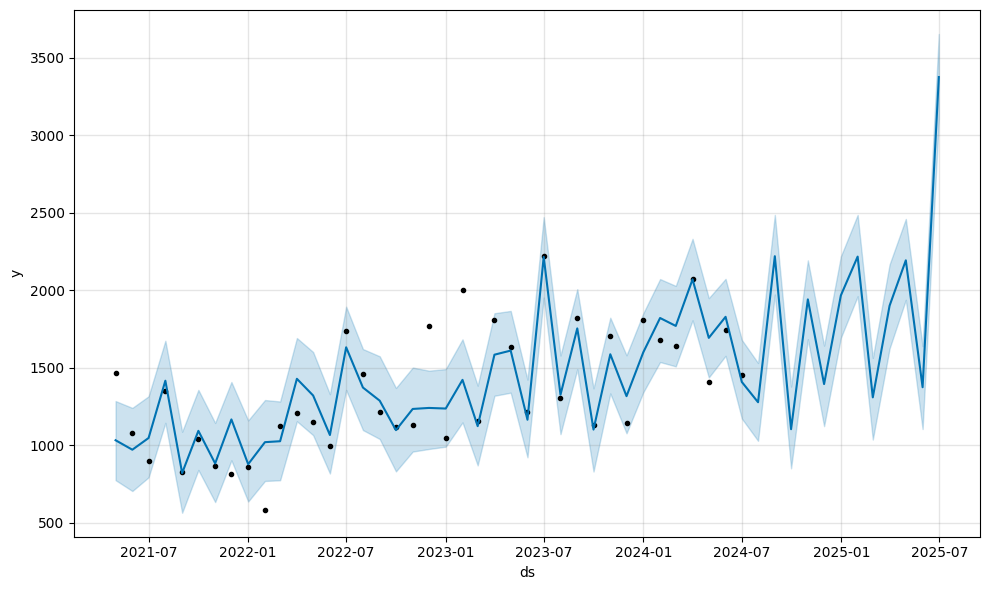

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



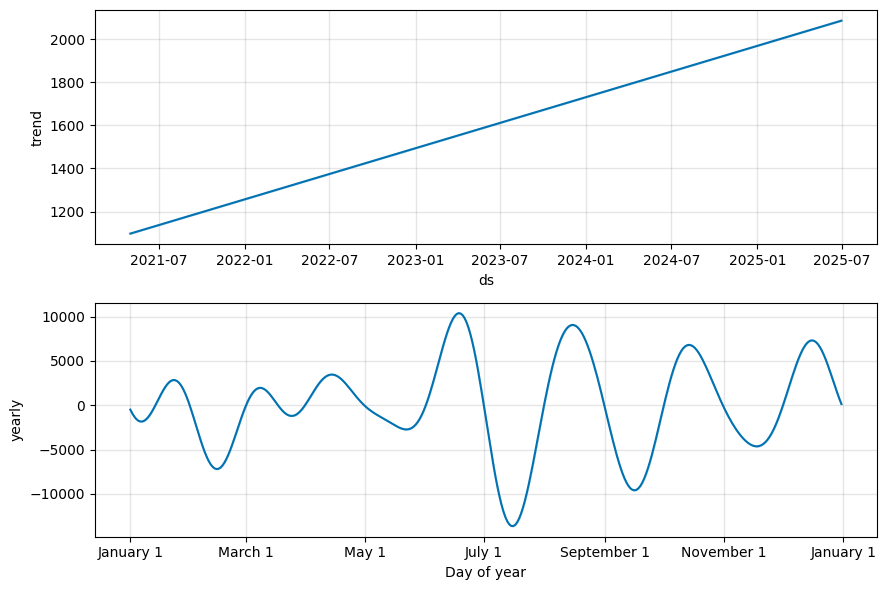

In [45]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()